In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

In [2]:
obesity = pd.read_csv("ObesityDataSet.csv")

In [3]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#Drop normal weight categories
Obese = obesity[obesity['NObeyesdad'] != 'Normal_Weight']

In [6]:
#Drop insufficient weight categories
obese = Obese[Obese['NObeyesdad'] != 'Insufficient_Weight']

In [7]:
#Drop all missing variables
obese.dropna()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
10,Male,26.000000,1.850000,105.000000,yes,yes,3.0,3.0,Frequently,no,3.000000,no,2.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I
11,Female,21.000000,1.720000,80.000000,yes,yes,2.0,3.0,Frequently,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II
13,Male,41.000000,1.800000,99.000000,no,yes,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
#Change Weight Categories to number using : 
#https://medium.com/analytics-vidhya/random-forest-on-titanic-dataset-88327a014b4d
categories = {"Overweight_Level_I": 0, "Overweight_Level_II": 1, "Obesity_Type_I": 2, "Obesity_Type_II": 3, "Obesity_Type_III":4}
obese["NObeyesdad"] = obese["NObeyesdad"].map(categories)

/var/folders/gl/qxlv3q8d2q11vxm3jzbdps4h0000gn/T/ipykernel_38581/725500125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obese["NObeyesdad"] = obese["NObeyesdad"].map(categories)


In [9]:
#check if worked
obese.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,1
10,Male,26.0,1.85,105.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,2.0,2.0,Sometimes,Public_Transportation,2
11,Female,21.0,1.72,80.0,yes,yes,2.0,3.0,Frequently,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,1
13,Male,41.0,1.80,99.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Automobile,2


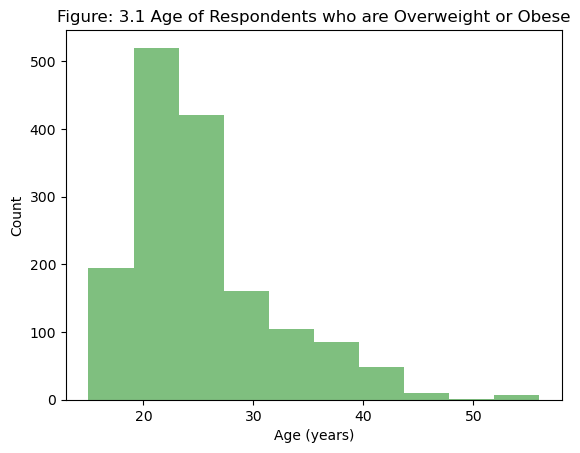

In [10]:
#Age histogram
num_bins = 10
plt.hist(obese['Age'], num_bins, facecolor='green', alpha=0.5)
plt.title('Figure: 3.1 Age of Respondents who are Overweight or Obese')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

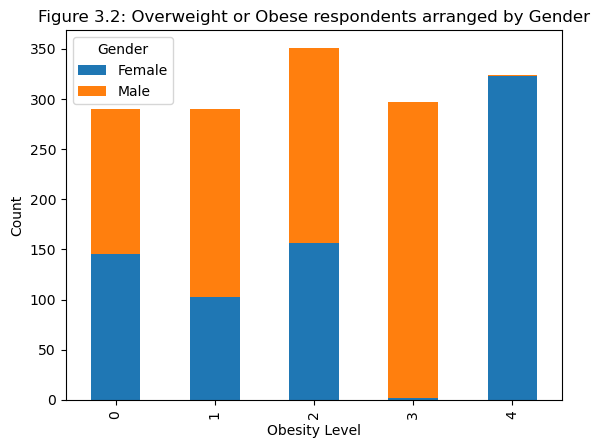

In [11]:
#Stacked bar chart of count of category and Gender
labels = ['Obesity Level I', 'Obesity Level II', 'Obesity Level III', 'Overweight Level I','Overweight Level II']
figure = obese.groupby(['NObeyesdad','Gender']).size().unstack().plot(kind='bar', stacked = True)
plt.title('Figure 3.2: Overweight or Obese respondents arranged by Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

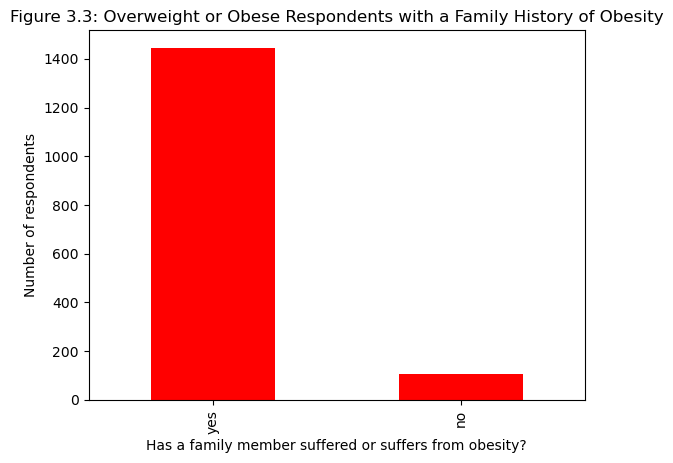

In [12]:
#Barchart of family history with obesity count 
obese['family_history_with_overweight'].value_counts().plot.bar(color = 'red')
plt.title('Figure 3.3: Overweight or Obese Respondents with a Family History of Obesity')
plt.ylabel('Number of respondents')
plt.xlabel('Has a family member suffered or suffers from obesity?')
plt.show()

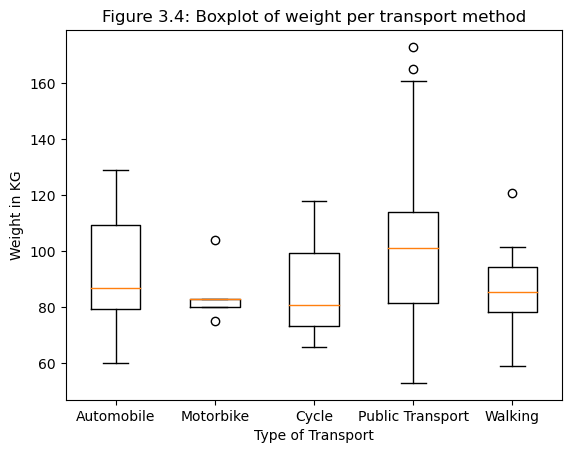

In [13]:
#Method of Transport BoxPlot
car = obese[obese['MTRANS'] == 'Automobile']['Weight']
motorbike = obese[obese['MTRANS'] == 'Motorbike']['Weight']
bike = obese[obese['MTRANS'] == 'Bike']['Weight']
pub_trans = obese[obese['MTRANS'] == 'Public_Transportation']['Weight']
walk = obese[obese['MTRANS'] == 'Walking']['Weight']
method = [car, motorbike, bike, pub_trans, walk]
label = ['Automobile', 'Motorbike', 'Cycle', 'Public Transport', 'Walking']
plt.boxplot(method, labels=label)
plt.title('Figure 3.4: Boxplot of weight per transport method')
plt.xlabel("Type of Transport")
plt.ylabel("Weight in KG")

plt.show()

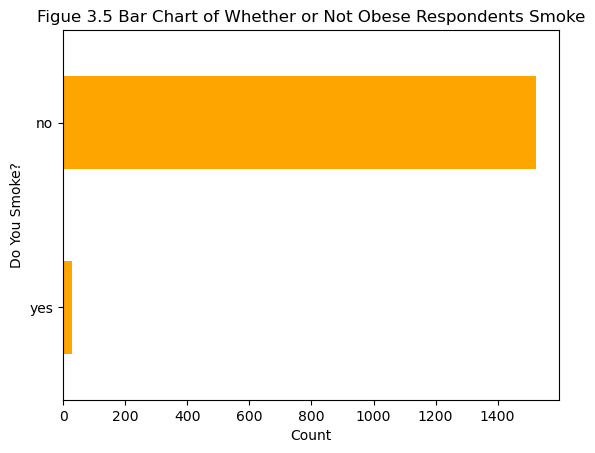

In [14]:
#Horizontal bar chart of smoking levels
obese['SMOKE'].value_counts().sort_values().plot.barh(color = 'orange')
plt.ylabel('Do You Smoke?')
plt.xlabel('Count')
plt.title('Figue 3.5 Bar Chart of Whether or Not Obese Respondents Smoke')
plt.show()

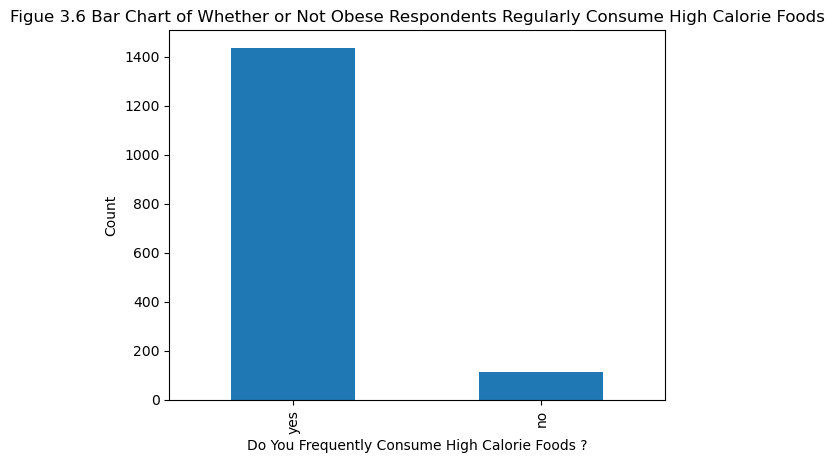

In [15]:
#Bar chart of high calorie food consumption levels
obese['FAVC'].value_counts().plot.bar()
plt.ylabel('Count')
plt.xlabel('Do You Frequently Consume High Calorie Foods ?')
plt.title('Figue 3.6 Bar Chart of Whether or Not Obese Respondents Regularly Consume High Calorie Foods')
plt.show()

Text(0, 0.5, 'Volume of exercise')

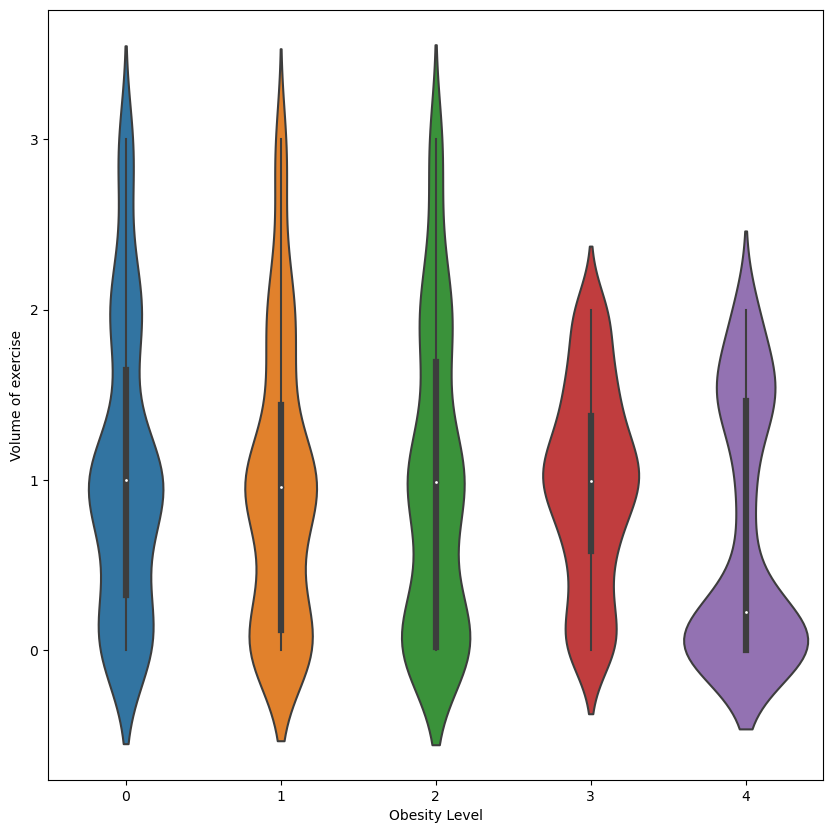

In [16]:
#Violin plot of obesity level and level of exercise
plt.figure(figsize= (10,10))
sns.violinplot(x= obese['NObeyesdad'], y= obese['FAF'])
plt.xlabel("Obesity Level")
plt.ylabel("Volume of exercise")

In [17]:
#Change rest of variables to numeric using code from:
#https://www.statology.org/convert-categorical-variable-to-numeric-pandas/
cat_columns = obese.select_dtypes(['object']).columns
obese[cat_columns] = obese[cat_columns].apply(lambda x: pd.factorize(x)[0])
obese

/var/folders/gl/qxlv3q8d2q11vxm3jzbdps4h0000gn/T/ipykernel_38581/2377297646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obese[cat_columns] = obese[cat_columns].apply(lambda x: pd.factorize(x)[0])


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,0,0,0
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,1,1,1
10,0,26.000000,1.850000,105.000000,1,1,3.0,3.0,1,0,3.000000,0,2.000000,2.000000,1,1,2
11,1,21.000000,1.720000,80.000000,1,1,2.0,3.0,1,0,2.000000,1,2.000000,1.000000,1,1,1
13,0,41.000000,1.800000,99.000000,0,1,2.0,3.0,0,0,2.000000,0,2.000000,1.000000,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,0,1.676269,0.906247,1,1,4
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,0,1.341390,0.599270,1,1,4
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,0,1.414209,0.646288,1,1,4
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,0,1.139107,0.586035,1,1,4


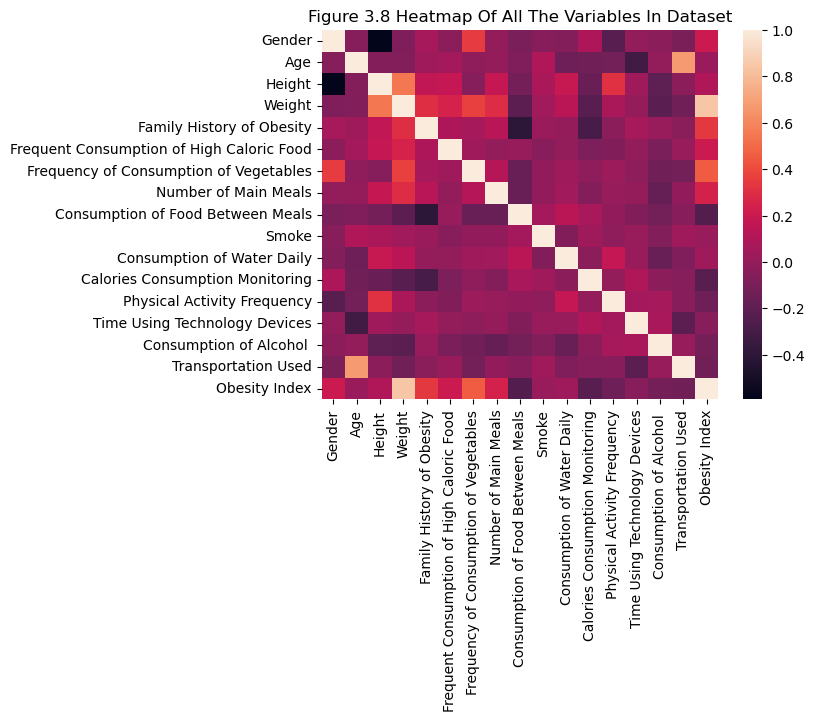

In [18]:
#Heatmap of all variables in the dataset
x_axis_labels = ['Gender','Age','Height','Weight','Family History of Obesity','Frequent Consumption of High Caloric Food','Frequency of Consumption of Vegetables','Number of Main Meals','Consumption of Food Between Meals','Smoke','Consumption of Water Daily','Calories Consumption Monitoring','Physical Activity Frequency','Time Using Technology Devices','Consumption of Alcohol ','Transportation Used','Obesity Index'] 
y_axis_labels = ['Gender','Age','Height','Weight','Family History of Obesity','Frequent Consumption of High Caloric Food','Frequency of Consumption of Vegetables','Number of Main Meals','Consumption of Food Between Meals','Smoke','Consumption of Water Daily','Calories Consumption Monitoring','Physical Activity Frequency','Time Using Technology Devices','Consumption of Alcohol ','Transportation Used','Obesity Index']
sns.heatmap(obese.corr(), xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Figure 3.8 Heatmap Of All The Variables In Dataset')
plt.show()

In [19]:
#SUPERVISED

In [20]:
#Segment data
target = obese.values[:,16]
data = obese.values[:,0:15]

In [21]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data, target, test_size=0.30)

In [26]:
#Run 5 times so it learns more
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, target, test_size = 0.30)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        90
         1.0       0.90      0.91      0.90        77
         2.0       0.94      0.93      0.94       109
         3.0       0.98      0.95      0.96        83
         4.0       1.00      0.99      1.00       107

    accuracy                           0.95       466
   macro avg       0.95      0.95      0.95       466
weighted avg       0.96      0.95      0.95       466

[[ 89   1   0   0   0]
 [  5  70   2   0   0]
 [  0   6 101   2   0]
 [  0   1   3  79   0]
 [  0   0   1   0 106]]


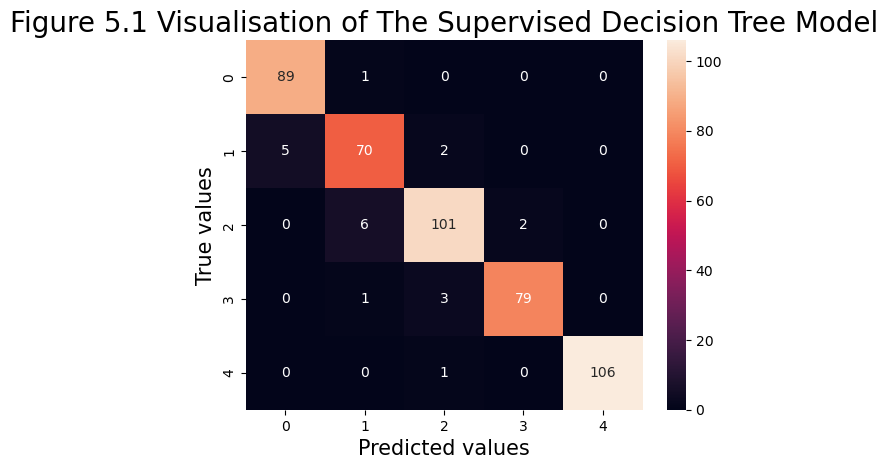

In [27]:
#Print confusion Matrix
confusionMatrix = metrics.confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusionMatrix, annot=True, fmt='.0f')
plt.title('Figure 5.1 Visualisation of The Supervised Decision Tree Model', fontsize = 20) 
plt.xlabel('Predicted values', fontsize = 15) 
plt.ylabel('True values', fontsize = 15) 
plt.show()

In [28]:
#UNSUPERVISED
obese.keys()

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [29]:
#investigate the shape of the dataset
n_samples, n_features = obese.shape
print("number of rows:", n_samples)
print("number of features:", n_features)

number of rows: 1552
number of features: 17


In [30]:
#segment data and find number of unique values 
target = obese.values[:,16]
data = obese.values[:,0:15]
n_digits = len(np.unique(obese.NObeyesdad))
print("number of different values for the target:", n_digits)

number of different values for the target: 5


In [31]:
#scale the data
data = scale(data)

In [32]:
#Cosine
model = cluster.AgglomerativeClustering(n_clusters=5, linkage="average", metric="cosine")

In [33]:
model.fit(data)

AgglomerativeClustering(linkage='average', metric='cosine', n_clusters=5)

In [34]:
print("Silhouette Coefficient:", metrics.silhouette_score(data, model.labels_))
print("Completeness score:", metrics.completeness_score(target, model.labels_))
print("Homogeneity score:", metrics.homogeneity_score(target, model.labels_))

Silhouette Coefficient: 0.14781644989971948
Completeness score: 0.37552720253819843
Homogeneity score: 0.319745826261432


In [35]:
#Manhattan
model = cluster.AgglomerativeClustering(n_clusters=5, linkage="average", metric="manhattan")
model.fit(data)

AgglomerativeClustering(linkage='average', metric='manhattan', n_clusters=5)

In [36]:
print("Silhouette Coefficient:", metrics.silhouette_score(data, model.labels_))
print("Completeness score:", metrics.completeness_score(target, model.labels_))
print("Homogeneity score:", metrics.homogeneity_score(target, model.labels_))

Silhouette Coefficient: 0.35369155781390405
Completeness score: 0.2249442120837418
Homogeneity score: 0.023245149744041082


In [37]:
#Euclidean
model = cluster.AgglomerativeClustering(n_clusters=5, linkage="average", metric="euclidean")
model.fit(data)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=5)

In [38]:
print("Silhouette Coefficient:", metrics.silhouette_score(data, model.labels_))
print("Completeness score:", metrics.completeness_score(target, model.labels_))
print("Homogeneity score:", metrics.homogeneity_score(target, model.labels_))

Silhouette Coefficient: 0.4421589686732665
Completeness score: 0.1759688846859186
Homogeneity score: 0.024868299653455543


In [39]:
#Hamming
model = cluster.AgglomerativeClustering(n_clusters=5, linkage="average", metric="hamming")
model.fit(data)

AgglomerativeClustering(linkage='average', metric='hamming', n_clusters=5)

In [40]:
print("Silhouette Coefficient:", metrics.silhouette_score(data, model.labels_))
print("Completeness score:", metrics.completeness_score(target, model.labels_))
print("Homogeneity score:", metrics.homogeneity_score(target, model.labels_))

Silhouette Coefficient: 0.19141829542126015
Completeness score: 0.16313106385221396
Homogeneity score: 0.010313332335707094


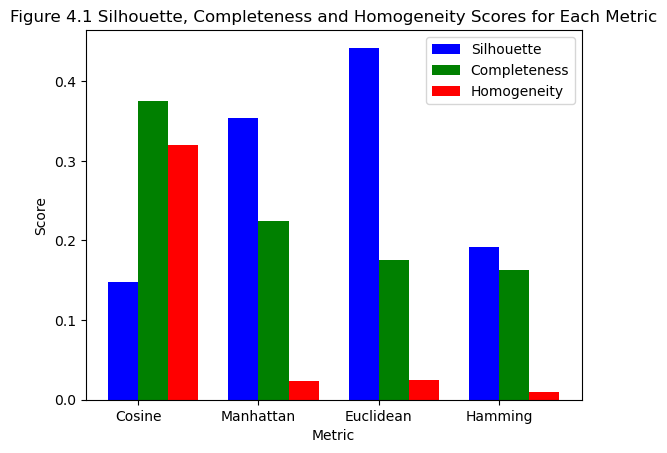

In [41]:
#Bar chart comparing metric results
Silhouette = [0.1478, 0.3536,0.4421,0.1914] 
Completeness = [0.3755,0.2249, 0.1759, 0.1631] 
Homogeneity = [0.3197, 0.0232,  0.0248, 0.0103]
n=4
r = np.arange(n) 
width = 0.25
plt.bar(r, Silhouette, color = 'b', 
        width = width, 
        label='Silhouette') 
plt.bar(r + width, Completeness, color = 'g', 
        width = width, 
        label='Completeness') 
plt.bar(r + 2 * width, Homogeneity, color = 'r', 
        width = width, 
        label='Homogeneity')

plt.xlabel("Metric") 
plt.ylabel("Score") 
plt.title("Figure 4.1 Silhouette, Completeness and Homogeneity Scores for Each Metric") 
  

plt.xticks(r + width/2,['Cosine','Manhattan','Euclidean','Hamming']) 
plt.legend() 
  
plt.show() 

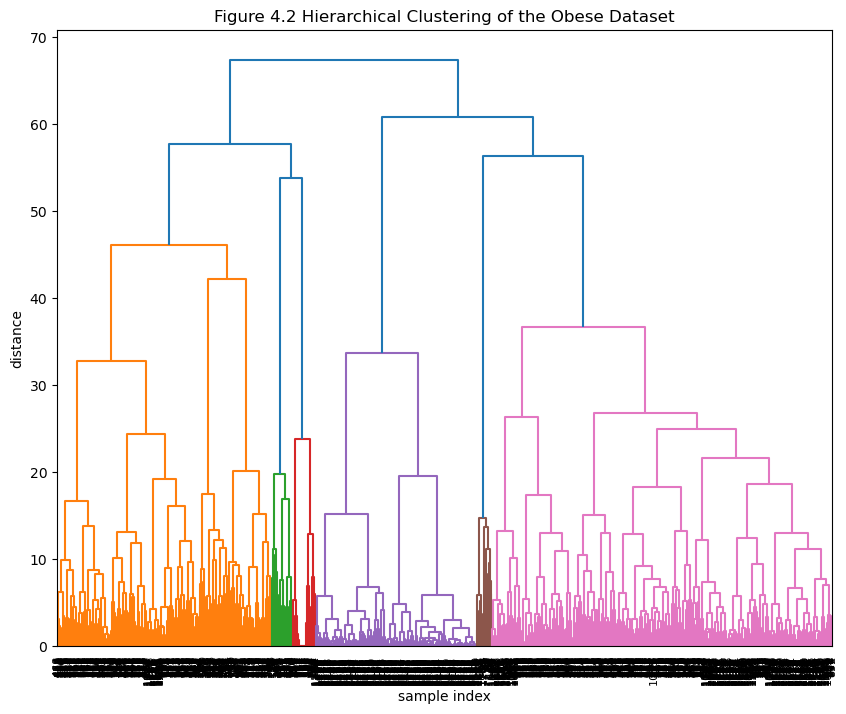

In [42]:
#Create Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
model1 = linkage(data, 'ward')
plt.figure(figsize=(10,8))
plt.title('Figure 4.2 Hierarchical Clustering of the Obese Dataset')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model1, leaf_rotation=90., leaf_font_size=8.,)
plt.show()